K-means clustering 2

In [2]:
import pandas as pd
customer = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv')

In [4]:
customer.head()
#Card Number (ID)
#Purchase Category
#Transaction Amount

cc_num       category     amt
0  2703186189652095           misc    4.97
1      630423337322        grocery  107.23
2    38859492057661  entertainment  220.11
3  3534093764340240  gas_transport   45.00
4   375534208663984           misc   41.96

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [7]:
customer['cc_num'].nunique()
# Checking the number of unique card numbers.

100

In [8]:
customer['category'].nunique()
# Checking the number of unique purchase categories.

11

In [9]:
# After calculating how much each customer spent in each category, I applied K-means clustering to group customers with similar spending patterns.

In [10]:
customer_dummy = pd.get_dummies(customer, columns = ['category'])
customer_dummy.head()

cc_num     amt  category_entertainment  category_food_dining  \
0  2703186189652095    4.97                   False                 False   
1      630423337322  107.23                   False                 False   
2    38859492057661  220.11                    True                 False   
3  3534093764340240   45.00                   False                 False   
4   375534208663984   41.96                   False                 False   

   category_gas_transport  category_grocery  category_health_fitness  \
0                   False             False                    False   
1                   False              True                    False   
2                   False             False                    False   
3                    True             False                    False   
4                   False             False                    False   

   category_home  category_kids_pets  category_misc  category_personal_care  \
0          False               False           True                   False   
1          False               False          False                   False   
2          False               False          False                   False   
3          False               False          False                   False   
4          False               False           True                   False   

   category_shopping  category_travel  
0              False            False  
1              False            False  
2              False            False  
3              False            False  
4              False            False

In [11]:
# In other words, each category is split into a separate column, where a value of 1 indicates that the entry belongs to that category, and 0 otherwise.
# This transforms the data into a numerical format suitable for algorithms like K-means.

In [12]:
cat_list = customer_dummy.columns[2:]

for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']

In [13]:
agg = customer_dummy.groupby('cc_num').sum()

In [14]:
agg.head()

amt  category_entertainment  category_food_dining  \
cc_num                                                                  
60495593109    48149.62                 3169.74               4043.46   
571365235126  259784.87                13864.51               9055.51   
571465035400  270081.63                16162.98              15448.75   
630412733309   41959.52                 3212.46               1543.16   
630423337322  244612.73                12786.75               6905.07   

              category_gas_transport  category_grocery  \
cc_num                                                   
60495593109                  5076.36           7576.58   
571365235126                36525.79          48812.73   
571465035400                 9081.62          41643.82   
630412733309                 5786.98           8416.70   
630423337322                36460.40          43854.26   

              category_health_fitness  category_home  category_kids_pets  \
cc_num                                                                     
60495593109                   1631.22        5458.58             4924.97   
571365235126                 13685.60       19342.79            17726.82   
571465035400                 15244.03       28282.98            13737.95   
630412733309                  3201.04        2474.68             3648.97   
630423337322                 12136.74       21106.87            16807.24   

              category_misc  category_personal_care  category_shopping  \
cc_num                                                                   
60495593109         4889.57                 3135.25            8106.36   
571365235126       32542.61                16672.08           45994.60   
571465035400       15880.82                 8771.27           59454.96   
630412733309        3109.83                 2592.17            7586.79   
630423337322       32400.76                15885.32           44287.02   

              category_travel  
cc_num                         
60495593109            137.53  
571365235126          5561.83  
571465035400         46372.45  
630412733309           386.74  
630423337322          1982.30

In [15]:
mask = (customer['cc_num'] == 630423337322) & (customer['category'] == 'grocery')
expected_total = customer.loc[mask, 'amt'].sum()
print(f"ÏàòÎèô Í≥ÑÏÇ∞Ìïú grocery Ï¥ù Í∏àÏï°: {expected_total}")

computed_total = agg.loc[630423337322, 'category_grocery']
print(f"K-meansÏö©ÏúºÎ°ú ÎßåÎì† agg ÌÖåÏù¥Î∏îÏùò grocery Í∏àÏï°: {computed_total}")

ÏàòÎèô Í≥ÑÏÇ∞Ìïú grocery Ï¥ù Í∏àÏï°: 43854.26
K-meansÏö©ÏúºÎ°ú ÎßåÎì† agg ÌÖåÏù¥Î∏îÏùò grocery Í∏àÏï°: 43854.26


In [16]:
diff = customer_dummy.copy()

customer_check = pd.get_dummies(customer, columns=['category'])
cat_cols = customer_check.columns[2:-1]  # category Ïó¥Îì§ Ï∂îÏ∂ú (amt Ï†úÏô∏)

for col in cat_cols:
    customer_check[col] = customer_check[col] * customer_check['amt']

check_agg = customer_check.groupby('cc_num')[cat_cols].sum()

difference = agg[cat_cols] - check_agg
print("Ï∞®Ïù¥ ÏûàÎäî Í∞í Í∞úÏàò:", (difference.abs() > 1e-6).sum().sum())  # 0Ïù¥Î©¥ Ï†ïÌôïÌûà ÏùºÏπò

Ï∞®Ïù¥ ÏûàÎäî Í∞í Í∞úÏàò: 0


KNN and K-means clustering are distance-based algorithms, so they are sensitive to the scale of the data. Therefore, I applied scaling using the StandardScaler.

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled = pd.DataFrame(sc.fit_transform(agg), columns = agg.columns,\
                     index = agg.index)

In [18]:
scaled.head()

amt  category_entertainment  category_food_dining  \
cc_num                                                                 
60495593109  -1.402327               -1.135617             -0.971069   
571365235126  1.079407                0.414075              0.168880   
571465035400  1.200151                0.747127              1.622968   
630412733309 -1.474915               -1.129427             -1.539741   
630423337322  0.901491                0.257905             -0.320220   

              category_gas_transport  category_grocery  \
cc_num                                                   
60495593109                -1.000180         -1.118217   
571365235126                2.090013          0.767268   
571465035400               -0.606627          0.439476   
630412733309               -0.930355         -1.079803   
630423337322                2.083588          0.540547   

              category_health_fitness  category_home  category_kids_pets  \
cc_num                                                                     
60495593109                 -1.561756      -1.145051           -1.276913   
571365235126                 1.040236       0.844969            1.127922   
571465035400                 1.376630       2.126364            0.378610   
630412733309                -1.222903      -1.572733           -1.516610   
630423337322                 0.705908       1.097814            0.955178   

              category_misc  category_personal_care  category_shopping  \
cc_num                                                                   
60495593109       -1.124693               -1.070260          -1.141424   
571365235126       1.210503                1.807350           0.659967   
571465035400      -0.196523                0.127825           1.299938   
630412733309      -1.274986               -1.185705          -1.166127   
630423337322       1.198524                1.640103           0.578781   

              category_travel  
cc_num                         
60495593109         -0.619930  
571365235126        -0.222587  
571465035400         2.766891  
630412733309        -0.601675  
630423337322        -0.484796

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

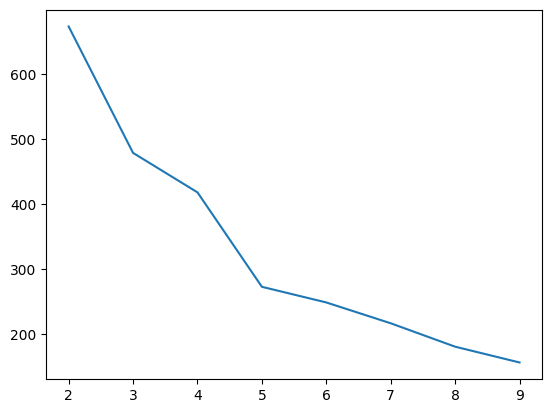

In [23]:
distance = []

for k in range(2,10):
    md = KMeans(n_clusters = k)
    md.fit(scaled)
    labels = md.predict(scaled)
    distance.append(md.inertia_)

sns.lineplot(x = range(2,10), y = distance)

The graph gradually decreases without a sharp drop at any specific point, making it difficult to determine the optimal K value.

**-Solution: Silhouette Coefficient**

This metric considers both the average distance within a cluster and the average distance to the nearest neighboring cluster when calculating the score. It serves as an alternative to the elbow method for identifying the optimal number of clusters.

In [24]:
from sklearn.metrics import silhouette_score

s = []

for k in range(2,10):
    md = KMeans(n_clusters = k)
    md.fit(scaled)
    labels = md.predict(scaled)
    s.append(silhouette_score(scaled, labels))

<Axes: >

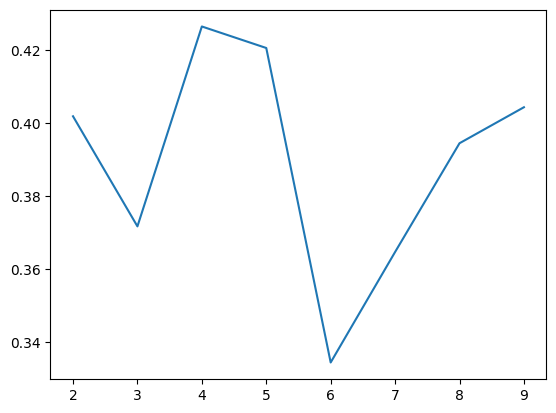

In [25]:
sns.lineplot(x = range(2,10), y = s)

In [26]:
md = KMeans(n_clusters = 4)
md.fit(scaled)
labels = md.predict(scaled)
labels

array([0, 1, 3, 0, 1, 3, 0, 1, 3, 0, 3, 0, 0, 0, 3, 2, 0, 0, 3, 0, 3, 2,
       3, 0, 1, 0, 2, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 2, 1, 0, 3, 1, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 3, 0, 2,
       3, 0, 3, 3, 0, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 0, 3, 1, 0, 0, 0, 1], dtype=int32)

In [27]:
scaled['label'] = labels

In [28]:
scaled_mean = scaled.groupby('label').mean()
scaled_count = scaled.groupby('label').count()['category_travel']

In [29]:
scaled_count = scaled_count.rename('count')

In [30]:
scaled = scaled_mean.join(scaled_count)
scaled

amt  category_entertainment  category_food_dining  \
label                                                           
0     -0.901958               -0.764983             -0.783699   
1      0.802017                0.502568              0.272467   
2      2.246930                2.636017              2.102489   
3      0.308619                0.187994              0.385680   

       category_gas_transport  category_grocery  category_health_fitness  \
label                                                                      
0                   -0.656687         -0.677806                -0.900760   
1                    1.822572          0.343507                 0.960828   
2                   -0.339554          2.553883                 1.526188   
3                    0.164849          0.161186                 0.385732   

       category_home  category_kids_pets  category_misc  \
label                                                     
0          -0.868026           -0.915129      -0.722170   
1           0.768643            1.205174       0.951714   
2           1.118452            1.527483       2.410239   
3           0.490409            0.317783       0.028610   

       category_personal_care  category_shopping  category_travel  count  
label                                                                     
0                   -0.793534          -0.732325        -0.285396     42  
1                    0.951892           0.416040        -0.224286     13  
2                    2.042583           2.581577        -0.269260      7  
3                    0.175151           0.191529         0.441768     38

from matplotlib import pyplot as plt
scaled['amt'].plot(kind='hist', bins=20, title='amt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_entertainment'].plot(kind='hist', bins=20, title='category_entertainment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_food_dining'].plot(kind='hist', bins=20, title='category_food_dining')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_gas_transport'].plot(kind='hist', bins=20, title='category_gas_transport')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled.plot(kind='scatter', x='amt', y='category_entertainment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled.plot(kind='scatter', x='category_entertainment', y='category_food_dining', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled.plot(kind='scatter', x='category_food_dining', y='category_gas_transport', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled.plot(kind='scatter', x='category_gas_transport', y='category_grocery', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
scaled['amt'].plot(kind='line', figsize=(8, 4), title='amt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_entertainment'].plot(kind='line', figsize=(8, 4), title='category_entertainment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_food_dining'].plot(kind='line', figsize=(8, 4), title='category_food_dining')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
scaled['category_gas_transport'].plot(kind='line', figsize=(8, 4), title='category_gas_transport')
plt.gca().spines[['top', 'right']].set_visible(False)

Cluster 0 (42 customers)
Negative z-scores for total spending (amt) and all categories ‚Üí indicates overall low spending.

Particularly low in health, home, kids_pets, and misc categories.

üëâ Budget-conscious customer group with generally minimal expenditures

Cluster 1 (13 customers)
Very high spending in gas_transport (z = +1.82).

Also shows relatively high values in misc, personal_care, and shopping.

üëâ Customers with concentrated spending in specific categories, especially transportation, but overall with no strong defining pattern.

üëâ Typical consumer group with moderate behavior.

Cluster 2 (7 customers)
Extremely high z-scores across almost all categories, including entertainment, grocery, shopping, and personal_care (many above +2).

Highest overall spending (amt) with a z-score of +2.25.

üëâ VIP customer segment, representing the top 10% of high spenders across nearly all categories.

üëâ Highly valuable, premium consumer group.

Cluster 3 (38 customers)
Most categories are near average (z ‚âà 0), indicating typical spending levels.

Slightly elevated spending in travel (z = +0.44), and moderately higher in health, home as well.

üëâ Travel-oriented customer group with otherwise average consumption.

üëâ General consumers with specific interest in travel-related expenses.